
# Sect 14 - Hypothesis Testing - T-Tests

- online-ds-ft-070620
- 08/12/20



# Questions

- Resampling Methods  Lab
I second going over this lab. I had to look at the solution when it got to the permutation part. What is the solution code doing for section 1.5 and section 1.6? Also is the math in the explanation for 1.6 wrong? For example, it says 5/3 - 2 = ½ but 5/3 - 2 should equal ⅓. 

- Not essential, but if time could we do the bonus to find effect size on 1 sample t-test lab

- Statistical Power (will def cover tomorrow if not today)

    -  When do we think/worry about this?
    



# Topics / Learning Objectives

- Briefly Review: Normal distribution / Z-tests 
- Discuss Central Limit Theorem & Sampling
- The T-Distribution (and degrees of Freedom)
- Intro to AB Testing / Big-Picture Hypothesis Testing Workflow

# Resources

- **My Complete Outline / Resource Repo for Hypothesis Testing**
    - URL: https://github.com/jirvingphd/hypothesis_testing_workflow_python
    - Includes:
        - Practice Hypothesis Testing Project
        - [Hypothesis Testing Slide Show (Code Academy)](https://github.com/jirvingphd/hypothesis_testing_workflow_python/blob/master/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf)
        - [Notebook with Full Hypothesis Testing Outline](https://nbviewer.jupyter.org/github/jirvingphd/hypothesis_testing_workflow_python/blob/master/hypothesis_testing_workflow.ipynb)
    
    
- [Hypothesis Testing Cheat Sheet](https://drive.google.com/file/d/17ePxNQdfM3OdrKEr_v0rVmivv9mNI_6I/view?usp=sharing)


# Section 14: Hypothesis Testing

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-onl01-dtsc-ft-030220/master/images/new_the-scientific-method.png">

## Foundations of a Sound Experiment

- **Control Group/Random Controlled Trials**

- **If humans are administering the experiment and/or grading/recording observations** about the groups, we should ideally use a **double blind** design (though single blind is better than nothing).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-online-ds-pt-100719/master/images/new_double_blind.png" width=60%>

- **Sampling Techniques:**
    - Sampling is independent
    - Sample is collected randomly
    - Sample is approximately normally distributed
    - Appropriate sample size
    
- **Reproducibility**

## P-Values & Null Hypotheses

**_Null Hypothesis_**: There is no relationship between A and B   
Example: "There is no relationship between this flu medication and a reduced recovery time from the flu".

The _Null Hypothesis_ is usually denoted as $H_{0}$

**_Alternative Hypothesis_**: The hypothesis traditionally thought of when creating a hypothesis for an experiment  
Example: "This flu medication reduces recovery time for the flu."

The _Alternative Hypothesis_ is usually denoted as $H_{1}$


> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

$\alpha$ **_(alpha)_**: The marginal threshold at which you're okay with rejecting the null hypothesis. 
> If you set an alpha value of $\alpha = 0.05$, you're essentially saying "I'm okay with accepting my alternative hypothesis as true if there is less than a 5% chance that the results that I'm seeing are actually due to randomness."

**_p-value_**: The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If you calculate a p-value and it comes out to 0.03, you can interpret this as saying "There is a 3% chance of obtaining the results I'm seeing when the null hypothesis is true."  




In simple terms:

$p < \alpha$: Reject the _Null Hypothesis_ and accept the _Alternative Hypothesis_

$p >= \alpha$: Fail to reject the _Null Hypothesis_.  


> **_Example One-Tail Hypothesis_**

$H_{1} : \mu_1 < \mu_2 $ The treatment group given this weight loss drug will lose more weight on average than the control group that was given a competitor's weight loss drug 

$ H_{0} : \mu1 >= \mu_2$  The treatment group given this weight loss drug will not lose more weight on average than the control group that was given a competitor's weight loss drug". 

> A **_Two-Tail Test_** is for when you want to test if a parameter falls between (or outside of) a range of two given values. 

**_Example Two-Tail Hypothesis_**

$H_{1} : \mu_1 \neq \mu_2$ "People in the experimental group that are administered this drug will not lose the same amount of weight as the people in the control group.  They will be heavier or lighter". 

$H_{0} : \mu_1 = \mu_2$ "People in the experimental group that are administered this drug will lose the same amount of weight as the people in the control group." 




***When in doubt, do a 2-tailed test***

In [31]:
!pip install -U fsds
from fsds.imports import *

Requirement already up-to-date: fsds in /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.22)


You should consider upgrading via the 'pip install --upgrade pip' command.


(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:xlabel='Standard Deviation Units (sigma)', ylabel='Density'>)

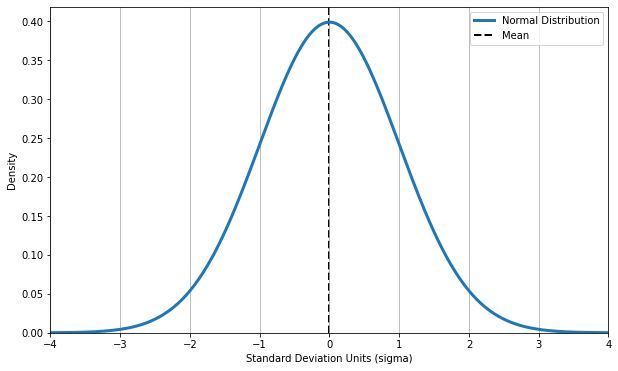

In [32]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax
plot_normal()

## The T-Distribution & T-Tests

- To adjust for small sample sizes, statisticians created the T-Distribution for hypothesis testing in lieu of the normal distribution.

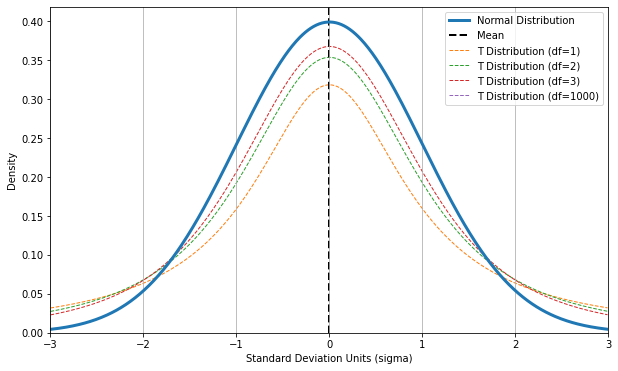

In [33]:
## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [1,2,3,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


1
-12.706204736432095 12.706204736432095


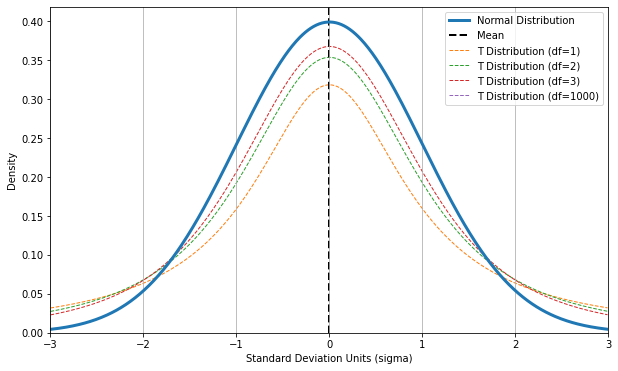

In [34]:
## Confidence Interval
ddof=1
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= ddof,#en(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

print(ddof)
print(ci_low,ci_high,)
ax.axvline(ci_low)
ax.axvline(ci_high)
fig


599
-1.963932248945269 1.963932248945269


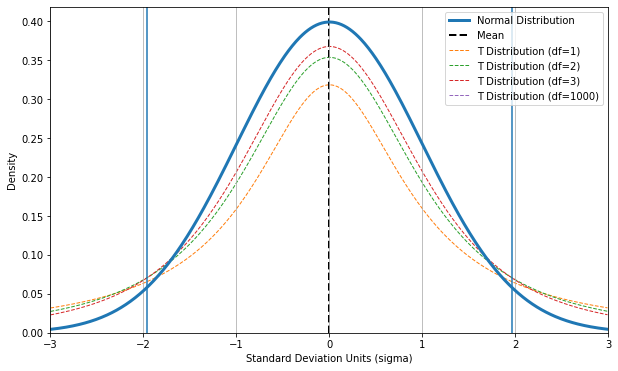

In [35]:
## Confidence Interval
ddof=len(x)-1
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= ddof, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

print(ddof)
print(ci_low,ci_high,)
ax.axvline(ci_low)
ax.axvline(ci_high)
fig


# Hypothesis Testing Worflow Notebook

- Complete Hypothesis Testing Workflow Repo + Practice Project:
    - https://github.com/jirvingphd/hypothesis_testing_workflow_python

- Two resource from repo included in this repo.
    - Open `hypothesis_testing_workflow-v2_WIP.ipynb`
    - Open `Hypothesis Testing with SciPy_codeacademy slides.pdf`

## Hypothesis Testing (summary)

- Separate data in group vars.
- Visualize data and calculate group n (size)

    
* Select the appropriate test based on type of comparison being made, the number of groups, the type of data.


- For t-tests: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**

    3. **Test for Homogeneity of Variance**

    4. **Choose appropriate test based upon the above** 
    
    
* **Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

## Statistical Tests Summary Table



| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 
 
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


# Hypothesis Testing Applied with Northwind Database

<img src ="../../datasets/Northwind_ERD_updated.png">

### Hypothesis 1

> Do discounted items sell sell in greater/lesser quantities than full price products?

- $H_0$: Discounted and full price sell in similar/the-same quantities.

- $H_A$:  Discounted items sell  larger/smaller quantities (on average)than full price items. 

## STEP 1: Determine the category/type of test based on your data.

###  What kind of test?
#### Using the answers to the above 2 questions: select the type of test from this table.

| What type of comparison? | Numeric Data | Categorical Data|
| --- | --- | --- |
|Sample vs Known Quantity/Target|1 Sample T-Test| Binomial Test|
|2 Samples | 2 Sample T-Test| Chi-Square|
|More than 2| ANOVA and/or Tukey | Chi Square|

## STEP 2:  Do we meet the assumptions of the chosen test?

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("../../datasets/Northwind_small.sqlite")
cur = conn.cursor()

In [37]:
df = pd.DataFrame(cur.execute('select * from OrderDetail').fetchall(),
                  columns=[col[0] for col in cur.description])
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [38]:
df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [39]:
df['discounted'] = df['Discount'].map(lambda x: 'Full Price' if x==0.0 else 'Discounted')
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,Full Price
1,10248/42,10248,42,9.80,10,0.00,Full Price
2,10248/72,10248,72,34.80,5,0.00,Full Price
3,10249/14,10249,14,18.60,9,0.00,Full Price
4,10249/51,10249,51,42.40,40,0.00,Full Price
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,Discounted
2151,11077/66,11077,66,17.00,1,0.00,Full Price
2152,11077/73,11077,73,15.00,2,0.01,Discounted
2153,11077/75,11077,75,7.75,4,0.00,Full Price


In [40]:
fullprice_products = df.groupby('discounted').get_group('Full Price')['Quantity']
fullprice_products

0       12
1       10
2        5
3        9
4       40
        ..
2147     2
2148     2
2151     1
2153     4
2154     2
Name: Quantity, Length: 1317, dtype: int64

In [41]:
discout_products = df.groupby('discounted').get_group('Discounted')['Quantity']
discout_products

6       35
7       15
8        6
9       15
11      40
        ..
2144     2
2146     3
2149     2
2150     2
2152     2
Name: Quantity, Length: 838, dtype: int64

In [42]:
zFP = np.abs(stats.zscore(fullprice_products))
idx_outliers = zFP > 3
idx_outliers

array([False, False, False, ..., False, False, False])

In [43]:
def find_outliers_z(fullprice_products):
    zFP = np.abs(stats.zscore(fullprice_products))
    idx_outliers = zFP > 3
    return idx_outliers

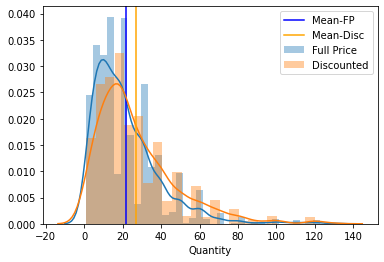

In [54]:
ax = sns.distplot(fullprice_products, label='Full Price')
ax.axvline(fullprice_products.mean(),color='blue',label='Mean-FP')

sns.distplot(discout_products, label="Discounted")
ax.axvline(discout_products.mean(),color='orange',label='Mean-Disc')

ax.legend()

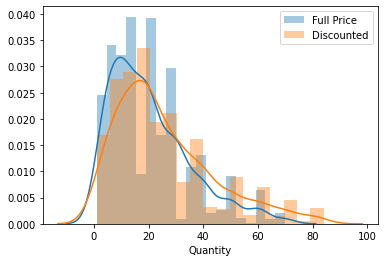

In [50]:
ax = sns.distplot(fullprice_products[~idx_outliers], label='Full Price')
sns.distplot(discout_products[~idx_outliers_d], label="Discounted")
ax.legend()

<BarContainer object of 1 artists>

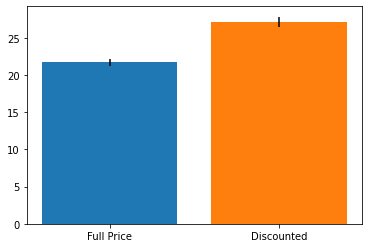

In [59]:
plt.bar('Full Price',fullprice_products.mean(), 
       yerr=stats.sem(fullprice_products))

plt.bar('Discounted',discout_products.mean(),
       yerr=stats.sem(discout_products))

<AxesSubplot:xlabel='discounted', ylabel='Quantity'>

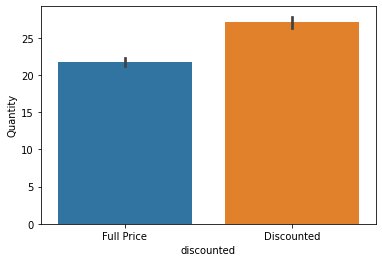

In [61]:
sns.barplot(data=df, x='discounted',y='Quantity',ci=68)

In [29]:
print(len(fullprice_products))
fullprice_products = fullprice_products[~idx_outliers]
print(len(fullprice_products))

1297


IndexError: Boolean index has wrong length: 1317 instead of 1297

In [63]:
stats.normaltest(fullprice_products[~idx_outliers])

NormaltestResult(statistic=189.4399007344143, pvalue=7.305471139042015e-42)

In [45]:
idx_outliers = find_outliers_z(fullprice_products)
idx_outliers.sum()

idx_outliers_d = find_outliers_z(discout_products)
idx_outliers_d.sum()

20

In [28]:
print(len(fullprice_products))
fullprice_products = fullprice_products[~idx_outliers]
print(len(fullprice_products))


1317
1297


# Next Class: Real-World Science / Experimental Design

> ## The Role of Stress Neurons in the Amygdala in Addiction/Binge Drinking

- We will be talking through some of the experiments from my Postdoctoral research on the roll of stress neurons in the escalation of binge drinking.
- [James' Neuroscience Research Poster: Society for Neuroscience 2016](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">



#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

## Hypothesis 

- Based on prior evidence in the field, stress neurons in the amygdala are believed to be responsible for the negative emotions that promote binge consumption to relieve negative symptoms

$ H_1$: Increasing the activity of stress neurons (CRF neurons) in the amygdala will increase the amount of alcohol consumed by binge-drinking mice.

$H_0$: Stimulation of CRF neurons has no effect on the amount of alcohol consumed.

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_preds1.png" width=60%>

## Experimental Design

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/opto_6steps.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1_no_mouse.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1.png">--->

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

In [ ]:
from fsds.imports import *

In [ ]:
plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->